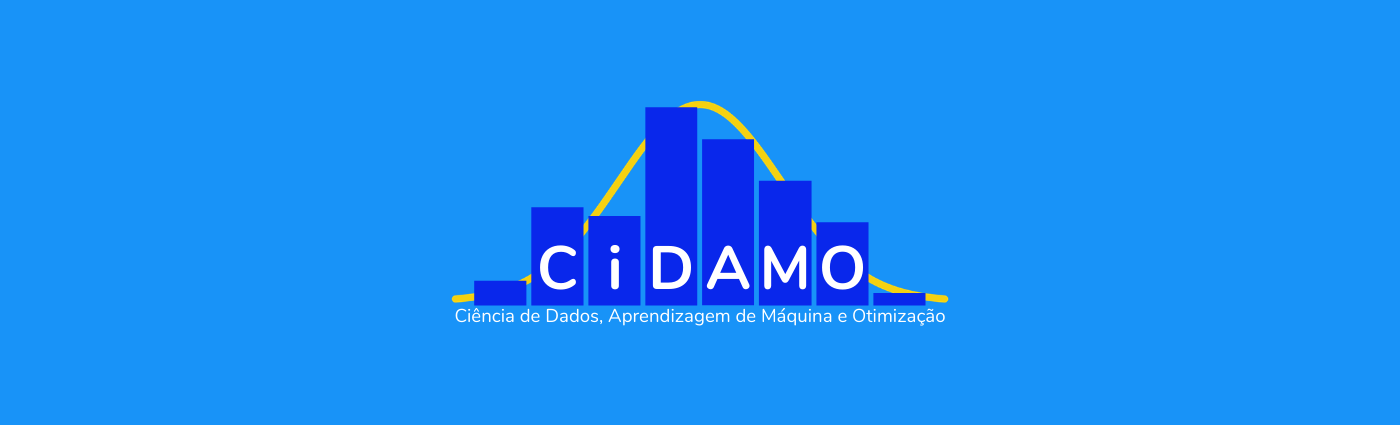


# Minicurso: Noções de Ingestão e Manipulação de Dados.

# Parte 2: Introdução ao pandas

**Grupo CiDAMO**

Esse notebook serve como material de apoio para o segundo encontro desse minicurso. Aqui, veremos uma introdução ao pandas, uma biblioteca para python usada para manipulação de dados tabulares.

Curso ministrado por: Maria Eduarda Mochinski

Material adaptado por João Victor da Silva, disponível no [GitHub](https://github.com/Jualns/pandas-workshop/tree/main/notebooks).

Nota: Adaptado e traduzido de `stefmolin`, para ter acesso ao workshop completo de pandas em inglês basta [clicar aqui](https://github.com/stefmolin/pandas-workshop/tree/main)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stefmolin/pandas-workshop/main?urlpath=lab/tree/notebooks/1-getting_started_with_pandas.ipynb) [![View slides in browser](https://img.shields.io/badge/view-slides-orange?logo=reveal.js&logoColor=white)](https://stefmolin.github.io/pandas-workshop/slides/html/workshop.slides.html#/section-1)

---



# Seção 1: Introdução ao Pandas

Vamos começar introduzindo as classes `Series`, `DataFrame` e `Index`, que são os blocos básicos da biblioteca pandas, e mostrando como trabalhar com elas. Ao final desta seção, você será capaz de criar DataFrames e realizar operações neles para inspecionar e filtrar os dados.

## O que é um DataFrame

Um **DataFrame** é composto por uma ou mais **Series**. Os nomes das **Series** formam os nomes das colunas, e os rótulos das linhas formam o **Index**.

*Fonte dos dados usados nesse notebook: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

Para baixar o arquivo: [clique aqui](https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?date=20231105&accessType=DOWNLOAD)

## Criando DataFrames

Podemos criar DataFrames a partir de várias fontes, como outros objetos Python, arquivos planos, web scraping e solicitações de API. Aqui, veremos apenas alguns exemplos, mas certifique-se de verificar [esta página](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) na documentação para uma lista completa.

### Usando um arquivo

In [ ]:
import pandas as pd

# passar como parametro o caminho do arquivo
# para usar nesse notebook é preciso importar o arquivo para o ambiente
meteorites = pd.read_csv('Meteorite_Landings.csv')

*Dica: Existem muitos parâmetros nesta função para lidar com algum processamento inicial ao ler o arquivo - certifique-se de consultar a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).*

### Usando uma API para obter os dados

Coletar os dados do [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) usando a Socrata Open Data API (SODA) com a biblioteca `requests`:

In [ ]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

Crie o DataFrame com o que foi carregado dos dados resultantes:

In [ ]:
import pandas as pd

df = pd.DataFrame(payload)
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN


*Dica: `df.to_csv('data.csv')` escreve esses dados em um novo arquivo chamado `data.csv`.*

### Lendo os dados a partir de um URL

De forma semelhante à leitura de um arquivo local, podemos passar um url, como o url usado para baixar o arquivo.

In [ ]:
url = 'https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?date=20231105&accessType=DOWNLOAD'

meteorites = pd.read_csv(url)
meteorites

## Inspecionando os dados
Agora que temos alguns dados, precisamos realizar uma inspeção inicial deles. Isso nos fornece informações sobre como os dados estão estruturados, quantas linhas/colunas existem e quanto dados temos.

Vamos inspecionar os dados `meteorites`.

#### Quantas linhas e colunas temos?

In [ ]:
meteorites.shape

(45716, 10)

#### Quais são os nomes das colunas?

In [ ]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### Qual o tipo de dados temos em cada coluna?

In [ ]:
meteorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

#### Como os dados se parecem?

In [ ]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Às vezes, pode haver dados supérfluos no final do arquivo, portanto, verificar as últimas poucas linhas também é importante:

In [ ]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


#### Vendo algumas informações sobre o DataFrame

In [ ]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Extraindo Subconjuntos

Uma parte crucial do trabalho com DataFrames é extrair subconjuntos dos dados: encontrar linhas que atendam a um determinado conjunto de critérios, isolar colunas/linhas de interesse, etc. Após reduzir nossos dados, estaremos mais próximos de descobrir insights. Esta seção será o alicerce de muitas tarefas de análise.

#### Selecionando Colunas

Podemos selecionar atributos das colunas se os nomes são variáveis válidas em Python:

In [ ]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

Se não forem, podemos usar 'Keys'. Portanto, podemos selecionar multiplas colunas em um único código:

In [ ]:
meteorites[['name', 'mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


#### Selecionando linhas

In [ ]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


#### Index

Podemos usar o `iloc[]` para selecionar as linhas e colunas pela posição:

In [ ]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


Podemos usar `loc[]` para selecionar por nome:

In [ ]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


#### Filtrando com máscaras Booleanas

Uma **máscara booleana** é uma estrutura semelhante a um array de valores booleanos - é uma maneira de especificar quais linhas/colunas queremos selecionar (`True`) e quais não queremos (`False`).

Aqui está um exemplo de uma máscara booleana para meteoritos com peso superior a 50 gramas que foram encontrados na Terra (ou seja, não foram observados caindo):

In [ ]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Importante**: Observe a sintaxe aqui. Colocamos cada condição entre parênteses e usamos operadores bitwise (`&`, `|`, `~`) em vez de operadores lógicos (`and`, `or`, `not`).

Podemos usar uma máscara booleana para selecionar o subconjunto de meteoritos que pesam mais de 1 milhão de gramas (1.000 quilogramas) e que foram observados caindo da seguinte forma:

In [ ]:
meteorites[(meteorites['mass (g)'] > 1e6) & (meteorites.fall == 'Fell')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Dica: máscaras booleanas podem ser usadas com `loc[]` e `iloc[]`.*

Uma alternativa é usar o método `query()`:

In [ ]:
meteorites.query("`mass (g)` > 1e6 and fall == 'Fell'")

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Dica: Aqui, podemos usar tanto operadores lógicos quanto operadores bitwise.*

## Cálculo de Estatísticas

Na próxima seção deste workshop, discutiremos a limpeza de dados para uma análise mais significativa de nossos conjuntos de dados; no entanto, já podemos extrair alguns insights interessantes dos dados dos `meteoritos` calculando estatísticas resumidas.

#### Quantos meteoritos encontramos versus observados?

In [ ]:
meteorites.fall.value_counts()

fall
Found    44609
Fell      1107
Name: count, dtype: int64

*Dica: Passando o código `normalize=True` para ver os resultados em porcentagem. Veja a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) para mais detalhes.*

#### Qual a massa média dos meteoritos?

In [ ]:
meteorites['mass (g)'].mean()

13278.078548601512

**Importante**: A média nem sempre é a melhor medida de tendência central. Se houver valores discrepantes na distribuição, a média será distorcida. Neste caso, a média está sendo puxada para cima por alguns meteoritos muito pesados - a distribuição está [desequilibrada à direita](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/).

Olhando para alguns quantis nos extremos da distribuição, percebemos que a média está entre o 95º e o 99º percentil da distribuição, portanto, não é uma boa medida de tendência central aqui:

In [ ]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.50       32.60
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

Uma medida melhor neste caso é a mediana (percentil 50), pois ela é robusta em relação a valores discrepantes:

In [ ]:
meteorites['mass (g)'].median()

32.6

#### Qual a massa do meteorito mais pesado?

In [ ]:
meteorites['mass (g)'].max()

60000000.0

Vamos extrair as informações desse meteorito:

In [ ]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

#### Qual a quantidade de tipos diferentes de classes são representadas nesse dataset?


In [ ]:
meteorites.recclass.nunique()

466

Exemplos:

In [ ]:
meteorites.recclass.unique()[:14]

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an'],
      dtype=object)

*Nota: Todos os campos que contém o "rec" são recomendadas pelo The Meteoritical Society. Veja nesse [Artigo Wikipedia](https://en.wikipedia.org/wiki/Meteorite_classification).*

#### Resumo de algumas estatísticas dos dados
Nós podemos obter algumas estatísticas de todas as colunas numéricas de uma única vez:

In [ ]:
meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,NaN,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,NaN,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,NaN,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,NaN,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,NaN,0.000000,157.166670,NaN


**Importante**: Valores `NaN` significam dados faltantes. Como sabemos, a coluna `fall` contém strings, então não temos valores para média (`mean`); Por outro lado a coluna, `mass (g)` é numérica, então não temos entradas categóricas para as informações (`unique`, `top`, `freq`).

#### Veja a documentação para a função describe:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

# Seção 2: Tratamento de Dados

Para preparar nossos dados para análise, precisamos realizar o tratamento de dados.

Nesta seção, aprenderemos como limpar e reformatar dados (por exemplo, renomear colunas e corrigir incompatibilidades de tipos de dados), reestruturá-los/remodelá-los e enriquecê-los (por exemplo, discretizar colunas, calcular agregações e combinar fontes de dados).

## Limpeza

Nesta seção, veremos como criar, renomear e eliminar colunas; conversão de tipo; e classificação &ndash; tudo isso facilita nossa análise. Trabalharemos com os dados de viagem de táxi amarelo de 2019 fornecidos pela NYC Open Data.

In [2]:
import pandas as pd

taxis = pd.read_csv('2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Fonte: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp). Link de download da base específica: [link](https://data.cityofnewyork.us/api/views/2upf-qytp/rows.csv?date=20231106&accessType=DOWNLOAD)

### Descartando ("Dropando") colunas

Vamos começar descartando as colunas de ID e a coluna `store_and_fwd_flag`, que não usaremos.

In [ ]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

In [ ]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

*Dica: Outro jeito de resolver isso seria deixando apenas as colunas que desejamos manter aplicando uma máscara assim como vimos na seção 1: `taxis.loc[:,~mask]`.*

### Renomeando colunas

A seguir, vamos renomear as colunas de data e hora:

In [ ]:
taxis = taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup',
        'tpep_dropoff_datetime': 'dropoff'
    }
)
taxis.columns

### Conversão de Tipo

Notou algo errado com os tipos de dados?

In [ ]:
taxis.dtypes

Tanto `pickup` quanto `dropoff` devem ser armazenados como datetime. Vamos consertar isso:

In [ ]:
taxis[['pickup', 'dropoff']] = taxis[['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

*Dica: Existem outras maneiras de realizar a conversão de tipo. Para valores numéricos, podemos usar a função `pd.to_numeric()`, e veremos o método `astype()`, que é um método mais genérico*

### Criando novas colunas

Vamos calcular o seguinte para cada linha:

1. tempo decorrido da viagem
2. a porcentagem da gorjeta
3. o total de impostos, pedágios, taxas e sobretaxas
4. a velocidade média do táxi

Podemos usar 2 principais métodos para definir novas colunas:

In [ ]:
#1 - referenciar a coluna em si
taxis['elapsed_time'] = taxis['dropoff'] - taxis['pickup']

#2 - usar funcoes lambda
taxis = taxis.assign(
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)

*Dica: Novo nas funções `lambda`? Essas funções pequenas e anônimas podem receber vários argumentos, mas só podem conter uma expressão (o valor de retorno). Você verá muito isso no código do pandas. Leia mais sobre eles [aqui](https://realpython.com/python-lambda/).*

Nossas novas colunas foram adicionaras a direita:

In [ ]:
taxis.head(2)

Algumas coisas a serem observadas:
- Usamos funções `lambda` para 1) evitar digitar `taxis` repetidamente e 2) poder acessar as colunas `cost_before_tip` e `elapsed_time` no mesmo método que as criamos.
- Para criar uma única nova coluna, também podemos usar `df['new_col'] = <values>`.

### Ordenando valores

Podemos usar o método `sort_values()` para classificar com base em qualquer número de colunas:

In [ ]:
taxis.sort_values(['passenger_count', 'pickup'], ascending=[False, True]).head()

Para escolher as linhas maiores/menores, use `nlargest()` / `nsmallest()`. Olhando para as 3 viagens com maior tempo decorrido, vemos alguns possíveis problemas de integridade de dados:

In [ ]:
taxis.nlargest(3, 'elapsed_time')

## Trabalhando com índices

Até agora, não trabalhamos realmente com o índice porque ele é apenas um número de linha; entretanto, podemos alterar os valores que temos no índice para acessar recursos adicionais da biblioteca pandas.

### Definindo e ordenando índices

Atualmente, temos um RangeIndex, mas podemos mudar para um DatetimeIndex especificando uma coluna de data e hora ao chamar `set_index()`:

In [ ]:
taxis = taxis.set_index('pickup')
taxis.head(3)

Como temos uma amostra do conjunto de dados completo, vamos classificar o índice por ordem de horário de coleta:

In [ ]:
taxis = taxis.sort_index()

*Dica: `taxis.sort_index(axis=1)` classificará as colunas por nome. O parâmetro `axis` está presente em toda a biblioteca do pandas: `axis=0` tem como alvo as linhas e `axis=1` tem como alvo as colunas.*

Agora podemos selecionar intervalos de nossos dados com base na data e hora da mesma forma que fizemos com os números das linhas:

In [ ]:
taxis['2019-10-23 07:45':'2019-10-23 08']

Quando não especificamos um range, usamos o `loc[]`:

In [ ]:
taxis.loc['2019-10-23 08']

### Redefinindo o índice

Às vezes queremos redefinir nosso índice para números de linha e restaurar as colunas. Podemos transformar `pickup` em uma coluna novamente com o método `reset_index()`:

In [ ]:
taxis = taxis.reset_index()
taxis.head()

## Remodelando (Reshape) dados

O conjunto de dados de táxi com o qual estamos trabalhando está em um formato que permite uma análise. Nem sempre é esse o caso. Vamos agora dar uma olhada nos dados de rendimento dos viajantes da TSA, que comparam o rendimento de 2021 com o mesmo dia em 2020 e 2019:

In [ ]:
tsa = pd.read_csv('tsa_passenger_throughput.csv', parse_dates=['Date'])
tsa.head()

*Fonte: [TSA.gov](https://www.tsa.gov/coronavirus/passenger-throughput)*

Primeiro, colocaremos os nomes das colunas em letras minúsculas e usaremos a primeira palavra (por exemplo, `2021` para `2021 Traveler Throughput`) para facilitar o trabalho:

In [ ]:
tsa = tsa.rename(columns=lambda x: x.lower().split()[0])
tsa.head()

Agora podemos remodelar os dados.

### Melting

O melting da tabela permite remodelar os dados para um formato longo, como geralmente estamos acostumados.

In [ ]:
tsa_melted = tsa.melt(
    id_vars='date', # coluna(s) que identifica unicamente a linha
    var_name='year', # nome da variavel advinda das colunas
    value_name='travelers' # nome da nova variavel contendo os valores
)
tsa_melted.head(10) # show some random entries

Para converter a data para o ano correto, precisamos trocar o ano da data da coluna `date`, caso contrário, o dia indicado não corresponde ao ano correto.

In [ ]:
tsa_melted = tsa_melted.assign(
    date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted.head()

Material extra:

- Reshape um dataframe: [link](https://youtu.be/oY62o-tBHF4)
- Formatar dados de data-horário: [link](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.strftime.html)
- Junções de tabelas: [link](https://pandas.pydata.org/docs/user_guide/merging.html)